#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Import packages

In [ ]:
import numpy as np
import pandas as pd

#Paths setting

In [ ]:
image_path='/content/gdrive/MyDrive/Personalized_Perception/Experiment_dataset/Cat_dataset/'

#Data Loading

##Loading rating sample experiment participant behavior data

In [ ]:
rating_sample_data=np.load('/content/gdrive/MyDrive/Personalized_Perception/Observer experiment result/experiment result/Rating sampled experiment data/Rating sample 2000 result.npy',allow_pickle=True).item()

In [ ]:
rating_sample_data.keys()

dict_keys(['Eddy', 'Jack Lo'])

In [ ]:
participant='Jack Lo'

In [ ]:
classes_distribution={}
class_imgs={}
for img,value in rating_sample_data[participant].items():
  if str(value) not in classes_distribution.keys():
    classes_distribution[f'{value}']=1
    class_imgs[f'{value}']=[img]
  else:
    classes_distribution[f'{value}']+=1
    class_imgs[f'{value}'].append(img)

In [ ]:
classes_distribution

{'1.0': 202,
 '2.0': 407,
 '3.0': 487,
 '4.0': 354,
 '5.0': 313,
 '6.0': 158,
 '7.0': 79}

In [ ]:
class_1=[]
class_2=[]
class_3=[]

for i in range(300):
  if class_imgs['1.0']:
    class_1.append(class_imgs['1.0'].pop())
  elif class_imgs['2.0']:
    class_2.append(class_imgs['2.0'].pop())
  else:
    class_3.append(class_imgs['3.0'].pop())

class_7=[]
class_6=[]
class_5=[]

for i in range(300):
  if class_imgs['7.0']:
    class_7.append(class_imgs['7.0'].pop())
  elif class_imgs['6.0']:
    class_6.append(class_imgs['6.0'].pop())
  else:
    class_5.append(class_imgs['5.0'].pop())

In [ ]:
not_cute_data_train=class_1[:int(len(class_1)*0.8)]+class_2[:int(len(class_2)*0.8)]+class_3[:int(len(class_3)*0.8)]
cute_data_train=class_7[:int(len(class_7)*0.8)]+class_6[:int(len(class_6)*0.8)]+class_5[:int(len(class_5)*0.8)]
not_cute_data_test=class_1[int(len(class_1)*0.8):]+class_2[int(len(class_2)*0.8):]+class_3[int(len(class_3)*0.8):]
cute_data_test=class_7[int(len(class_7)*0.8):]+class_6[int(len(class_6)*0.8):]+class_5[int(len(class_5)*0.8):]

In [ ]:
X_train_data=not_cute_data_train+cute_data_train
Y_train=[1 if i//len(not_cute_data_train) else 0 for i in range(len(cute_data_train)*2)]
X_test_data=not_cute_data_test+cute_data_test
Y_test=[1 if i//len(not_cute_data_test) else 0 for i in range(len(cute_data_test)*2)]

In [ ]:
#Loading rating W latent space map
w_latent_space=np.load(r'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Image latent space data/W/rating_experiment_2000_image_W_latent_space_data_map.npy',allow_pickle=True).item()

In [ ]:
X_train=[]
for img in X_train_data:
  X_train.append(w_latent_space[img[7:]][0,0,:])

X_test=[]
for img in X_test_data:
  X_test.append(w_latent_space[img[7:]][0,0,:])

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

#Loading linear svm from sklearn 



##Loading packages

In [ ]:
from sklearn import svm
from sklearn import metrics

##set up functions and classification model

In [ ]:
def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (metrics.accuracy_score(y, yPred), 
         metrics.precision_score(y, yPred), 
         metrics.recall_score(y, yPred),
         metrics.f1_score(y, yPred))

def my_scorer(estimator, x, y):
    a, p, r ,f= getScores(estimator, x, y)
    print( a, p, r, f)
    return a,p,r,f

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
table={'clf_name':'linear_svm'}
table['Accuracy']=metrics.accuracy_score(Y_test, y_pred)
table['Percision']=metrics.precision_score(Y_test, y_pred)
table['Recall']=metrics.recall_score(Y_test, y_pred)
table['F1_Score']=metrics.f1_score(Y_test, y_pred)

In [ ]:
table

{'Accuracy': 0.7049180327868853,
 'F1_Score': 0.7096774193548387,
 'Percision': 0.6984126984126984,
 'Recall': 0.7213114754098361,
 'clf_name': 'linear_svm'}

##Save SVM model

In [ ]:
import os
import joblib

In [ ]:
os.mkdir(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/{participant}/')
joblib.dump(clf,f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/{participant}/{participant}_rating_experiment.joblib')

['/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Jack Lo/Jack Lo_rating_experiment.joblib']

##Load SVM model

In [ ]:
clf=joblib.load(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/{participant}/{participant}_rating_experiment.joblib') 

#Regenerate image from StyleGan2 ADA

##Load StyleGAN-ada Genertor

Download StyleGAN-ada afhqcat model

In [ ]:
%tensorflow_version 1.x
# ! pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html 

TensorFlow 1.x selected.


In [ ]:
import os
os.chdir('/content')
CODE_DIR = 'stylegan2-ada'

!git clone https://github.com/NVlabs/stylegan2-ada.git $CODE_DIR

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 74, done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 74
Unpacking objects: 100% (74/74), done.


In [ ]:
%cd /content/stylegan2-ada
import argparse
import os
import pickle
import re

import numpy as np
import PIL.Image

import dnnlib
import dnnlib.tflib as tflib
tflib.init_tf()
print('Loading networks from "%s"...' % 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqcat.pkl')
with dnnlib.util.open_url('https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqcat.pkl') as fp:
        _G, _D, Gs = pickle.load(fp)

/content/stylegan2-ada
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqcat.pkl"...


##Function for style_morphing

In [ ]:
from PIL import Image

In [ ]:
def reconstruct_latent_space(latent):
  reconstructed_latent=np.zeros((1,18,512))
  for i in range(len(reconstructed_latent[0])):
      reconstructed_latent[0][i]=latent
  return reconstructed_latent


In [ ]:
def style_morphing(initial_img_latent_space, style_dir, distance, steps):
  """
  Input:
    initial_img_latent_space -> numpy array [1,18,512] shape: the image's W latent space from pSp encoder
    style_dir -> numpy array [1,18,512] shape: the reconstructed SVM coef
    distance -> int: the distance from the SVM dicition boundry
    steps -> int: the morphing steps
  Output:
    morghing_imgs -> numpy array [steps,512,512,3] shape: regenerated image matrix
  """
  target_latent_space=reconstruct_latent_space(style_dir*distance)+reconstruct_latent_space(initial_img_latent_space)
  latent_morphing=np.linspace(initial_img_latent_space, target_latent_space, num=steps)
  # print(latent_morphing.shape)
  morghing_imgs=[]
  for latent_space in latent_morphing:
    morghing_imgs.append(Gs.components.synthesis.run(latent_space, output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:])
  return np.array(morghing_imgs)

In [ ]:
def style_morphing_new(initial_img_latent_space, style_dir, distance, steps):
  """
  Input:
    initial_img_latent_space -> numpy array [1,18,512] shape: the image's W latent space from pSp encoder
    style_dir -> numpy array [1,18,512] shape: the reconstructed SVM coef
    distance -> int: the distance from the SVM dicition boundry
    steps -> int: the morphing steps
  Output:
    morghing_imgs -> numpy array [steps,512,512,3] shape: regenerated image matrix
  """
  target_latent_space=reconstruct_latent_space(style_dir-(style_dir.T*initial_img_latent_space)*initial_img_latent_space)
  latent_morphing=np.linspace(initial_img_latent_space, target_latent_space, num=steps)
  # print(latent_morphing.shape)
  morghing_imgs=[]
  for latent_space in latent_morphing:
    morghing_imgs.append(Gs.components.synthesis.run(latent_space, output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:])
  return np.array(morghing_imgs)

##Define style_dir of cuteness

In [ ]:
style_dir=clf.coef_[0]

##Evaluate correct_predicted sample

###loading pretrained VGG-19 model from torch

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19_bn', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
# Download ImageNet labels
os.chdir('/content')
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-05-30 15:43:28--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-05-30 15:43:28 (109 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

def pre_processing(img):
  input_image = Image.fromarray(img)
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)
  # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
  # print(output[0])
  # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  return probabilities

###Fetch correct_predicted Data

In [ ]:
cor_predict_img=X_test[[Y_test==y_pred]]
cor_predict_label=Y_test[Y_test==y_pred]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [ ]:
print(cor_predict_img.shape)
print(cor_predict_label.shape)

(86, 512)
(86,)


In [ ]:
#get distance from dicision boundry for each sample
cor_predict_d=clf.decision_function(cor_predict_img)

In [ ]:
cor_predict_d.shape

(86,)

###plotting image



####Fetch cute Data

In [ ]:
#randomly select five sample from cute data
np.random.seed(2000)
cute_mask=np.ones(cor_predict_label.shape)
cute_imgs=cor_predict_img[cor_predict_label==cute_mask]
cute_d=cor_predict_d[cor_predict_label==cute_mask]
randon_idx=np.random.choice([i for i in range(len(cute_imgs))],size=5,replace=False)

cute_sample=cute_imgs[randon_idx]
cute_sample_d=cute_d[randon_idx]

In [ ]:
print(cute_sample[0])
print(cute_sample_d)

[ 6.07897341e-03  5.25543839e-02 -2.07438096e-02  7.33716249e-01
 -5.63297391e-01  5.24150074e-01  4.16423321e-01  4.15609360e-01
  1.82399541e-01 -1.12925148e+00  9.58639503e-01 -7.78572738e-01
  9.79232192e-02  3.27873170e-01  3.89853746e-01  2.68799007e-01
 -7.28931367e-01  1.42356968e+00 -6.93189204e-01 -1.31284565e-01
  2.40572467e-01  4.25953478e-01 -2.10194647e-01 -8.26295972e-01
  5.71164548e-01  4.77597535e-01 -1.51643717e+00 -4.30407971e-01
  7.38578439e-01 -1.26514268e+00 -2.28872314e-01  8.07583451e-01
 -4.49135661e-01 -6.19079113e-01 -2.04094589e-01 -3.53818804e-01
  4.34119374e-01 -4.43508536e-01 -1.48951828e-01 -5.44588804e-01
  3.16434234e-01  2.42946759e-01  8.60988617e-01 -5.19604832e-02
  2.14715466e-01  4.29850370e-02  1.23593318e+00  4.26160768e-02
  1.41205251e-01 -3.91485661e-01  1.41786039e-01 -2.46965319e-01
  2.14247704e-01  6.59800112e-01  3.51633966e-01 -1.29715204e-01
 -5.23770034e-01  1.27842331e+00  8.49550128e-01 -1.06527060e-01
 -8.75909507e-01  1.03499

In [ ]:
# Read the categories
os.chdir('/content')
with open("imagenet_classes.txt", "r") as f:
  categories = [s.strip() for s in f.readlines()]

####Generate and save the imgs

In [ ]:
def get_concat_v(ims):
  dst = Image.new('RGB', (ims[0].width, ims[0].height*len(ims)))
  print(len(ims))
  for i,img in enumerate(ims):

    dst.paste(img, (0, img.height*i))

  return dst

In [ ]:
ims=[]
for i in range(0,5,1):
  ims.append(Image.fromarray(result_images[i]))
dst=get_concat_v(ims)

NameError: ignored

In [ ]:
dst.save('/content/1_v.png')

In [ ]:
#cuter style change
result=[]
result_images=[]
for latent,distance in zip(cute_sample,cute_sample_d):
  morpging_imgs=style_morphing(latent, style_dir, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
    result_images.append(morpging_imgs[i])
  result.append(Image.fromarray(image_list))

Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.


In [ ]:
image_o=Image.fromarray(Gs.components.synthesis.run(reconstruct_latent_space(cute_sample[0]), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:])

In [ ]:
image_o.save('/content/o.png')

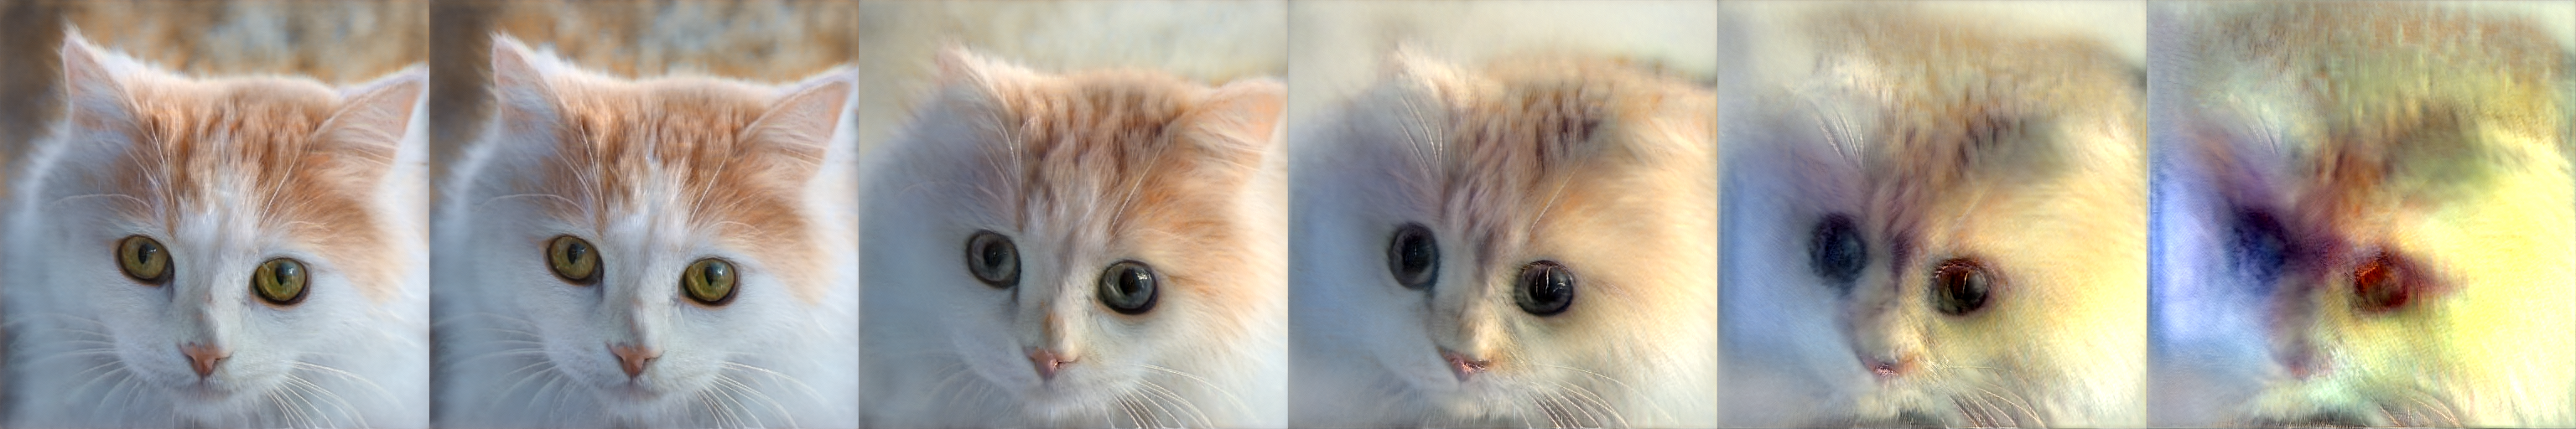

In [ ]:
result[0]

In [ ]:
result[0].save('1.png')

In [ ]:
np.array(result_images).shape

(25, 512, 512, 3)

In [ ]:
import matplotlib.pyplot as plt

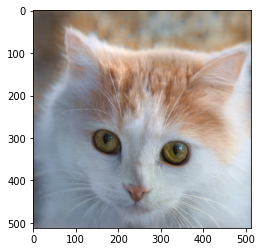

tiger cat 0.4938350319862366
tabby 0.1838044822216034
Egyptian cat 0.1316291242837906
Persian cat 0.05594552308320999
lynx 0.04607227072119713


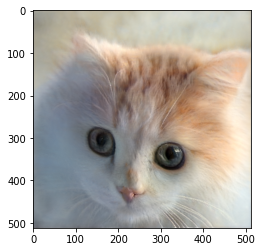

Persian cat 0.4846068322658539
Pomeranian 0.1376667469739914
tiger cat 0.05900443345308304
hamster 0.048341795802116394
lynx 0.04024926945567131


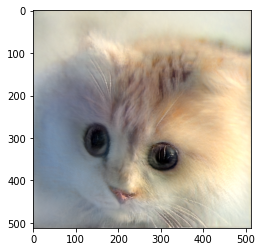

hamster 0.3597474694252014
Pomeranian 0.2976047098636627
langur 0.14899881184101105
Persian cat 0.08872374892234802
marmoset 0.019030747935175896


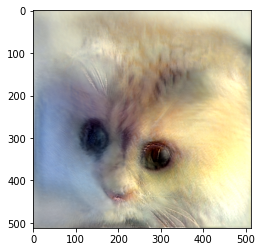

Pomeranian 0.2870059907436371
hamster 0.17479825019836426
Arctic fox 0.12820324301719666
capuchin 0.09381535649299622
langur 0.0913005992770195


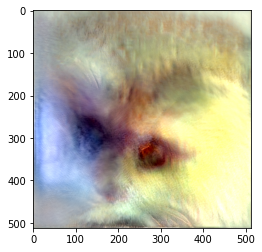

hamster 0.13782310485839844
baboon 0.12141702324151993
Angora 0.09856196492910385
Persian cat 0.08259671926498413
Pomeranian 0.07149609178304672


In [ ]:
for i in range(0,5,1):
  plt.imshow(result_images[i])
  plt.show()
  probabilities=pre_processing(result_images[i])
  top5_prob, top5_catid = torch.topk(probabilities, 5)
  for i in range(top5_prob.size(0)):
      print(categories[top5_catid[i]], top5_prob[i].item())

In [ ]:
#cuter style change
result_new=[]
result_images=[]
for latent,distance in zip(cute_sample,cute_sample_d):
  morpging_imgs=style_morphing_new(latent, style_dir, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
    result_images.append(morpging_imgs[i])
  result_new.append(Image.fromarray(image_list))

In [ ]:
#cuter style change
result_new_n=[]
result_images=[]
for latent,distance in zip(cute_sample,cute_sample_d):
  morpging_imgs=style_morphing_new(latent, -style_dir, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
    result_images.append(morpging_imgs[i])
  result_new_n.append(Image.fromarray(image_list))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_cuter/correct_perdicted_cute_sample_make_cuter_{i}_normalized.png')

In [ ]:
#uglyer style change
result=[]
result_images=[]
for latent,distance in zip(cute_sample,cute_sample_d):
  morpging_imgs=style_morphing(latent, -style_dir, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
    result_images.append(morpging_imgs[i])
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_uglier/correct_perdicted_cute_sample_make_uglyer_{i}_normalized.png')

####Fetch Ugly Data

In [ ]:
#randomly select five sample from ugly data
np.random.seed(2000)
ugly_mask=np.zeros(cor_predict_label.shape)
ugly_imgs=cor_predict_img[cor_predict_label==ugly_mask]
ugly_d=cor_predict_d[cor_predict_label==ugly_mask]
randon_idx=np.random.choice([i for i in range(len(ugly_imgs))],size=5,replace=False)

ugly_sample=ugly_imgs[randon_idx]
ugly_sample_d=ugly_d[randon_idx]

####Generate and save the imgs

In [ ]:
#cuter style change
result=[]
for latent,distance in zip(ugly_sample,ugly_sample_d):
  morpging_imgs=style_morphing(latent, style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_cuter/correct_perdicted_ugly_sample_make_cuter_{i}_normalized.png')

In [ ]:
#uglyer style change
result=[]
for latent,distance in zip(ugly_sample,ugly_sample_d):
  morpging_imgs=style_morphing(latent, -style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_uglier/correct_perdicted_ugly_sample_make_uglyer_{i}_normalized.png')

##Evaluate mis_predicted sample

###Fetch mis_predicted Data

In [ ]:
mis_predict_img=X_test[[Y_test!=y_pred]]
mis_predict_label=Y_test[Y_test!=y_pred]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [ ]:
#get distance from dicision boundry for each sample
mis_predict_d=clf.decision_function(mis_predict_img)

###plotting image

####Fetch cute Data

In [ ]:
#randomly select five sample from cute data
np.random.seed(2000)
cute_mask=np.ones(mis_predict_label.shape)
cute_imgs=mis_predict_img[mis_predict_label==cute_mask]
cute_d=mis_predict_d[mis_predict_label==cute_mask]
randon_idx=np.random.choice([i for i in range(len(cute_imgs))],size=5,replace=False)

cute_sample=cute_imgs[randon_idx]
cute_sample_d=cute_d[randon_idx]

####Generate and save the imgs

In [ ]:
#cuter style change
result=[]
result_images=[]
for latent,distance in zip(cute_sample,cute_sample_d):
  morpging_imgs=style_morphing(latent, -style_dir, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
    result_images.append(morpging_imgs[i])
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_cuter/mis_perdicted_cute_sample_make_cuter_{i}_normalized.png')

In [ ]:
#uglyer style change
result=[]
for latent,distance in zip(cute_sample,cute_sample_d):
  morpging_imgs=style_morphing(latent, -style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_uglier/mis_perdicted_cute_sample_make_uglyer_{i}_normalized.png')

####Fetch ugly Data

In [ ]:
#randomly select five sample from ugly data
np.random.seed(2000)
ugly_mask=np.zeros(mis_predict_label.shape)
ugly_imgs=mis_predict_img[mis_predict_label==ugly_mask]
ugly_d=mis_predict_d[mis_predict_label==ugly_mask]
randon_idx=np.random.choice([i for i in range(len(ugly_imgs))],size=5,replace=False)

ugly_sample=ugly_imgs[randon_idx]
ugly_sample_d=ugly_d[randon_idx]

####Generate and save the imgs

In [ ]:
#cuter style change
result=[]
for latent,distance in zip(ugly_sample,ugly_sample_d):
  morpging_imgs=style_morphing(latent, style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_cuter/mis_perdicted_ugly_sample_make_cuter_{i}.png')

In [ ]:
#uglyer style change
result=[]
for latent,distance in zip(ugly_sample,ugly_sample_d):
  morpging_imgs=style_morphing(latent, -style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_uglier/mis_perdicted_ugly_sample_make_uglyer_{i}.png')

##Evaluate Neutral sample

###Fetch Neutral Data

In [ ]:
neutral_data=[]
for img in class_imgs['4.0']:
  neutral_data.append(w_latent_space[img[7:]][0,0])
neutral_data=np.array(neutral_data)

In [ ]:
neutral_data_d=clf.decision_function(neutral_data)

In [ ]:
neutral_pred=clf.predict(neutral_data)

####Fetch Samples predicted as Cute 

In [ ]:
#randomly select five sample from cute data
np.random.seed(2000)
cute_mask=np.ones(neutral_pred.shape)
pred_cute_data=neutral_data[neutral_pred==cute_mask]
pred_cute_data_d=neutral_data_d[neutral_pred==cute_mask]
randon_idx=np.random.choice([i for i in range(len(pred_cute_data))],size=5,replace=False)

pred_cute_sample=pred_cute_data[randon_idx]
pred_cute_sample_d=pred_cute_data_d[randon_idx]

####Generate and save the imgs

In [ ]:
#cuter style change
result=[]
result_images=[]
for latent,distance in zip(pred_cute_sample,pred_cute_sample_d):
  morpging_imgs=style_morphing(latent, style_dir, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
    result_images.append(morpging_imgs[i])
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_cuter/perdicted_cute_neutral_sample_make_cuter_{i}_normalized.png')

In [ ]:
#uglier style change
result=[]
for latent,distance in zip(pred_cute_sample,pred_cute_sample_d):
  morpging_imgs=style_morphing(latent, -style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_uglier/perdicted_cute_neutral_sample_make_uglier_{i}_normalized.png')

####Fetch Samples predicted as ugly 

In [ ]:
#randomly select five sample from data
np.random.seed(2000)
ugly_mask=np.zeros(neutral_pred.shape)
pred_ugly_data=neutral_data[neutral_pred==ugly_mask]
pred_ugly_data_d=neutral_data_d[neutral_pred==ugly_mask]
randon_idx=np.random.choice([i for i in range(len(pred_ugly_data))],size=5,replace=False)

pred_ugly_sample=pred_ugly_data[randon_idx]
pred_ugly_sample_d=pred_ugly_data_d[randon_idx]

####Generate and save the imgs

In [ ]:
#cuter style change
result=[]
for latent,distance in zip(pred_ugly_sample,pred_ugly_sample_d):
  morpging_imgs=style_morphing(latent, style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_cuter/perdicted_ugly_neutral_sample_make_cuter_{i}_normalized.png')

In [ ]:
#uglier style change
result=[]
for latent,distance in zip(pred_ugly_sample,pred_ugly_sample_d):
  morpging_imgs=style_morphing(latent, -style_dir/distance, distance, steps=5)
  image_list=Gs.components.synthesis.run(reconstruct_latent_space(latent), output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))[0,:]# add the reconstructed real image
  for i in range(len(morpging_imgs)):
    image_list=np.concatenate([image_list,morpging_imgs[i]], axis=1)
  result.append(Image.fromarray(image_list))

In [ ]:
for i,img in enumerate(result):
  img.save(f'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Machine Learning model experiment with W latent space/SVM/Eddy/Style_changed_image/make_uglier/perdicted_ugly_neutral_sample_make_uglier_{i}_normalized.png')